Данный скрипт отображает некую статистику результирующих данных

In [39]:
import numpy as np
import scipy.stats as st
import csv
import matplotlib.pyplot as plt

In [40]:
name_file = ["matrix_res_500.csv", "matrix_res_1000.csv", "matrix_res_1500.csv"]
name_time = "matrix_time.csv"
list_number = [500, 1000, 1500]
confidence_level = 0.95  # уровень доверия

In [41]:
list_time = []
with open(name_time) as file: 
    reader = csv.reader(file)
    for row in reader: 
        list_time.append(row)
print(list_time)

[['521', '419', '408', '403', '426', '421', '396', '394', '393', '403'], ['3915', '3866', '3868', '3929', '3885', '3881', '3874', '3876', '4094', '3895'], ['12354', '12374', '14586', '14036', '13687', '13541', '13374', '13862', '13322', '13385']]


In [42]:
times = []
for i in list_time:
    times.append([int(item) for item in i])
dic_time = {}
dic_time[500] = times[0]
dic_time[1000] = times[1]
dic_time[1500] = times[2]
print(dic_time)

{500: [521, 419, 408, 403, 426, 421, 396, 394, 393, 403], 1000: [3915, 3866, 3868, 3929, 3885, 3881, 3874, 3876, 4094, 3895], 1500: [12354, 12374, 14586, 14036, 13687, 13541, 13374, 13862, 13322, 13385]}


In [43]:
list_mean = []
for i in dic_time.keys():
    sample = dic_time[i]
    median_value = np.median(sample)
    mean = np.mean(sample)
    list_mean.append(mean)
    var_v = np.var(sample)  
    std_dev = np.std(sample)  
    n = len(sample) 

    # Рассчет стандартной ошибки
    se = std_dev / var_v
    # Рассчет критического значения
    z = st.t.ppf((1 + confidence_level) / 2, n - 1)
    # Рассчет доверительного интервала
    lower_bound = mean - z * se
    upper_bound = mean + z * se

    min_v = np.min(sample)
    max_v = np.max(sample)
    print(f"         Результаты статистики для выбоки времени для матрицы размера {i} x {i}")
    print("Дисперсия:", var_v)
    print("Стандартное отклонение:", std_dev)
    print("Минимальное значение:", min_v)
    print("Максимальное значение:", max_v)
    print("Среднее значение: ", mean)
    print("Медиана:", median_value)
    print("Доверительный интервал: ({}, {})".format(lower_bound, upper_bound))
    print()

         Результаты статистики для выбоки времени для матрицы размера 500 x 500
Дисперсия: 1291.6399999999999
Стандартное отклонение: 35.93939342838162
Минимальное значение: 393
Максимальное значение: 521
Среднее значение:  418.4
Медиана: 405.5
Доверительный интервал: (418.33705633437444, 418.4629436656255)

         Результаты статистики для выбоки времени для матрицы размера 1000 x 1000
Дисперсия: 4205.61
Стандартное отклонение: 64.85067463026117
Минимальное значение: 3866
Максимальное значение: 4094
Среднее значение:  3908.3
Медиана: 3883.0
Доверительный интервал: (3908.265117445954, 3908.3348825540465)

         Результаты статистики для выбоки времени для матрицы размера 1500 x 1500
Дисперсия: 425341.89
Стандартное отклонение: 652.1824054664462
Минимальное значение: 12354
Максимальное значение: 14586
Среднее значение:  13452.1
Медиана: 13463.0
Доверительный интервал: (13452.096531404184, 13452.103468595817)



Text(0.5, 1.0, 'Гистограмма выборки времени для матрицы размера 500 x 500')

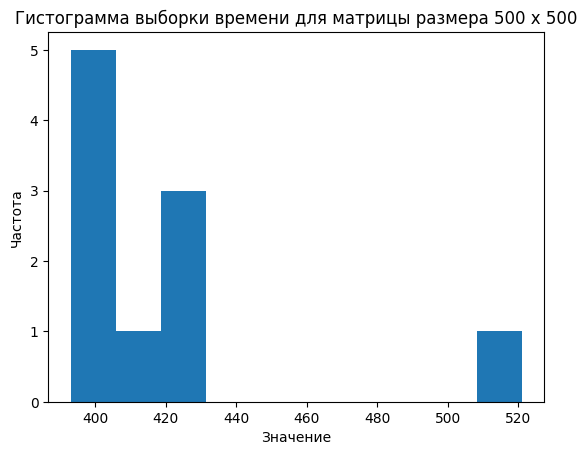

In [44]:
plt.hist(dic_time[500], bins=10)
plt.xlabel("Значение")
plt.ylabel("Частота")
plt.title("Гистограмма выборки времени для матрицы размера 500 x 500")

Text(0.5, 1.0, 'Гистограмма выборки времени для матрицы размера 1000 x 1000')

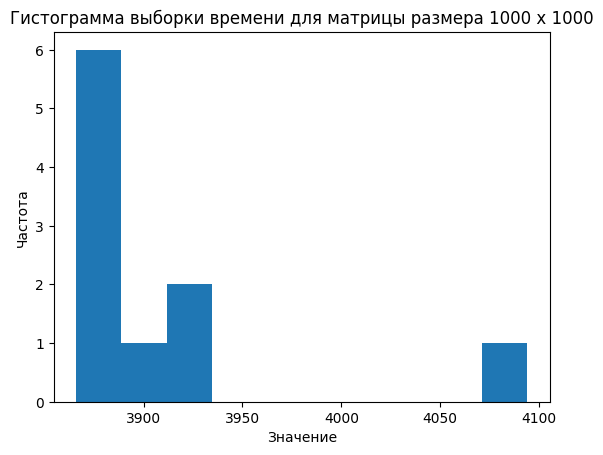

In [45]:
plt.hist(dic_time[1000], bins=10)
plt.xlabel("Значение")
plt.ylabel("Частота")
plt.title("Гистограмма выборки времени для матрицы размера 1000 x 1000")

Text(0.5, 1.0, 'Гистограмма выборки времени для матрицы размера 1500 x 1500')

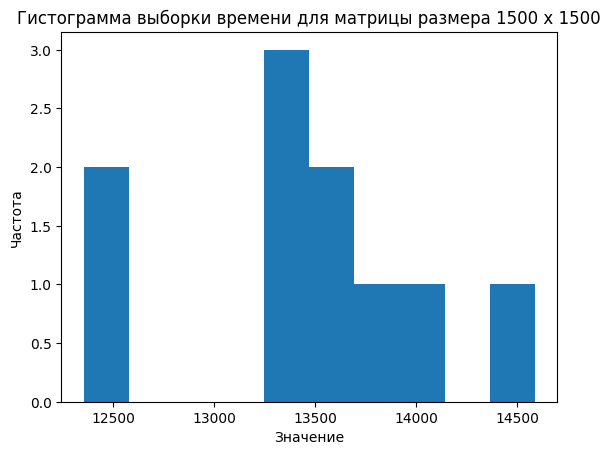

In [46]:
plt.hist(dic_time[1500], bins=10)
plt.xlabel("Значение")
plt.ylabel("Частота")
plt.title("Гистограмма выборки времени для матрицы размера 1500 x 1500")

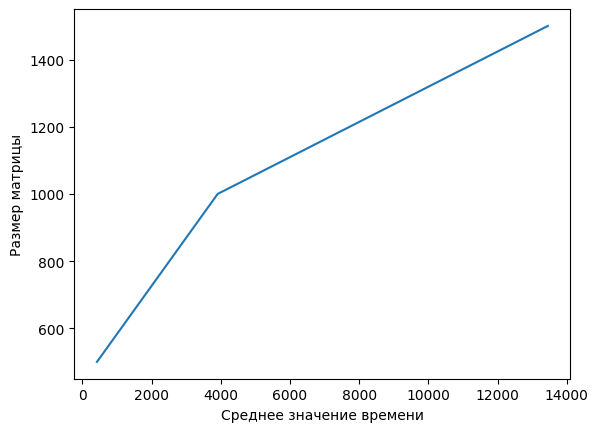

In [47]:
#создание графика зависимости времени реализации произведения квадратных матриц при разных размерах матрицы
#в данном случае размера 500, 1000, 1500
plt.plot(list_mean, list_number)
plt.xlabel('Среднее значение времени')
plt.ylabel('Размер матрицы')
plt.show()